In [36]:
# Task 3 CUSTOMER CHURN PREDICTION Submitted by Harinandhan
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [37]:
# reading data 
data =pd.read_csv('Churn_Modelling.csv')
#printing first 5 rows 
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [38]:
data.drop(columns = ['RowNumber','CustomerId','Surname'], inplace= True )

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [40]:
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [41]:
#explore number of rows & features 
print('number of rows = {}'.format(data.shape[0]))
print('number of cols or features  = {}'.format(data.shape[1]))

number of rows = 10000
number of cols or features  = 11


Text(0.5, 1.0, 'Comparsion betweeen Countries and Customers')

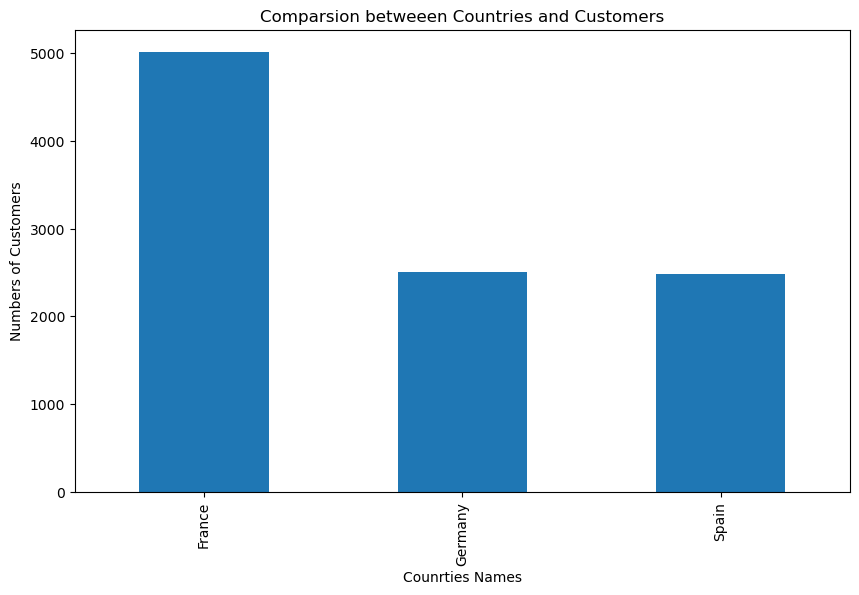

In [42]:
plt.figure(figsize=(10, 6))
data['Geography'].value_counts().plot(kind='bar')
plt.xlabel('Counrties Names')
plt.ylabel('Numbers of Customers')
plt.title("Comparsion betweeen Countries and Customers")

In [43]:
data= pd.get_dummies(data, columns= ['Geography', 'Gender'], drop_first=True)

In [44]:
X=data.drop(columns=['Exited'])
y=data['Exited']

In [45]:
# Spiliting dataset int train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, random_state=3)

In [46]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [47]:
X_train.shape

(7500, 11)

In [13]:
# Build a model (ANN) in tensorflow/keras
import tensorflow as tf
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Dense(6, activation='relu',input_dim=11),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

C:\Users\harin\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6201 - loss: 0.6432
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8077 - loss: 0.4706
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8107 - loss: 0.4301
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8145 - loss: 0.4229
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8333 - loss: 0.3969
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8366 - loss: 0.3832
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8381 - loss: 0.3821
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8365 - loss: 0.3837
Epoch 9/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8494 - loss: 0.3528
Epoch 10/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8580 - loss: 0.3516
Epoch 11/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8569 - loss: 0.3501
Epoch 12/100
235/235 ━━━━━━━━━━━━━━━━━━━━

In [14]:
# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [15]:
history = model.fit(X_train,y_train,batch_size=10,epochs=100,verbose=1,validation_split=0.25)

Epoch 1/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8639 - loss: 0.3270 - val_accuracy: 0.8629 - val_loss: 0.3395
Epoch 2/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8602 - loss: 0.3317 - val_accuracy: 0.8624 - val_loss: 0.3389
Epoch 3/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8569 - loss: 0.3397 - val_accuracy: 0.8619 - val_loss: 0.3413
Epoch 4/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8623 - loss: 0.3316 - val_accuracy: 0.8603 - val_loss: 0.3407
Epoch 5/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8683 - loss: 0.3284 - val_accuracy: 0.8613 - val_loss: 0.3411
Epoch 6/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8688 - loss: 0.3226 - val_accuracy: 0.8619 - val_loss: 0.3431
Epoch 7/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8598 - loss: 0.3383 - val_accuracy: 0.8576 - val_loss: 0.3453
Epoch 8/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8691 - loss: 0.3187 - val_accu

In [16]:
model.evaluate(X_test,y_test)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8603 - loss: 0.3440


[0.35199466347694397, 0.8575999736785889]

In [17]:
# predicting the test set result
y_pred = model.predict(X_test)
y_pred = (y_pred>0.5)
y_pred

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [18]:
from sklearn.metrics import accuracy_score
test_acc=accuracy_score(y_test,y_pred)
print('accuracy on test data = {}'.format(test_acc))

accuracy on test data = 0.8576


In [19]:
train_pre=model.predict(X_train)
train_pre = (train_pre>0.5)
train_acc=accuracy_score(y_train,train_pre)
print('accuracy on test data = {}'.format(train_acc))

235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
accuracy on test data = 0.8646666666666667


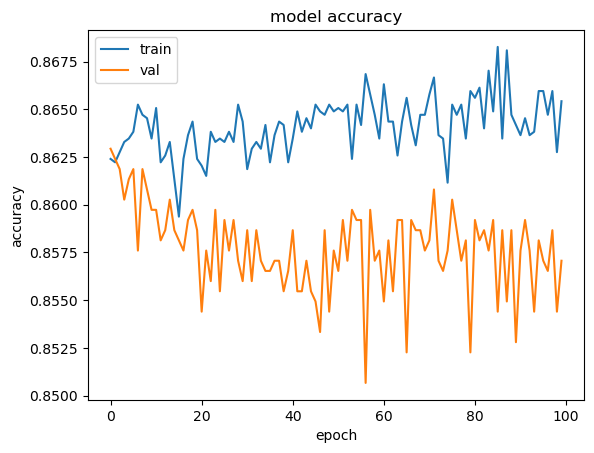

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

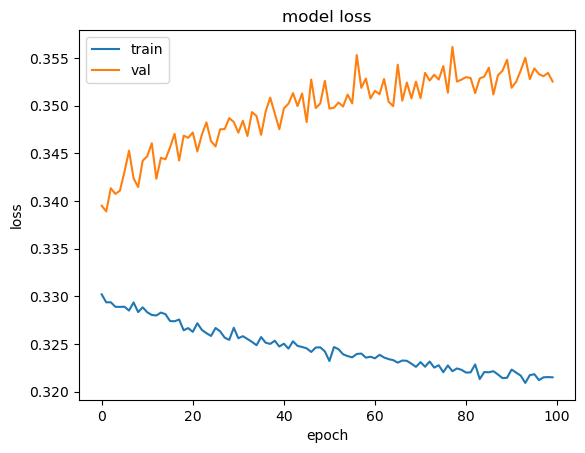

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

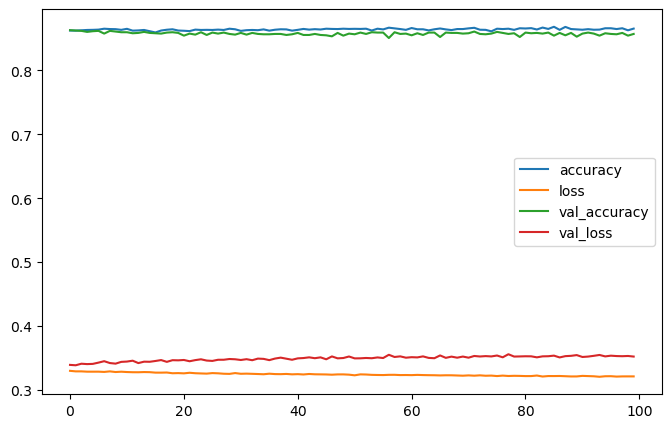

In [22]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [23]:
# predicting the test set result
y_pred = model.predict(X_test)
y_pred = (y_pred>0.5)
y_pred

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [24]:
from sklearn.metrics import confusion_matrix
confusion_metric = confusion_matrix(y_test, y_pred)
confusion_metric

array([[1904,   78],
       [ 278,  240]], dtype=int64)

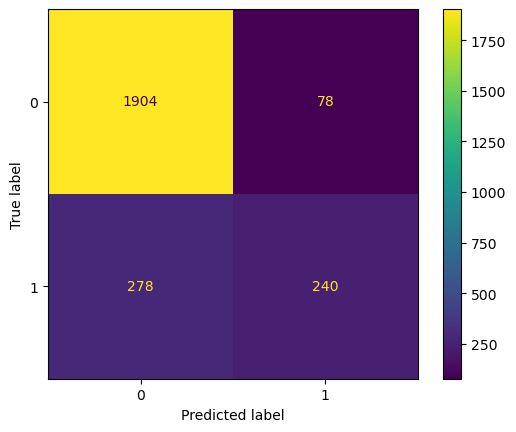

In [25]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_metric, display_labels=[0, 1])
cm_display.plot()

# Show the plot
plt.show()